In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten,Dense

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [2]:
train_path='./data/bird_train/'
test_path='./data/bird_test/'

In [3]:
train1=ImageDataGenerator().flow_from_directory(train_path,
                                                    target_size=(224,224),
                                                   classes=['black_footed_albatross',
                                                           'red_winged_blackbird',
                                                           'cardinal','blue_jay',
                                                           'western_meadowlark',
                                                           'golden_winged_warbler'],
                                                           batch_size=5)

test1=ImageDataGenerator().flow_from_directory(test_path,
                                                    target_size=(224,224),
                                                   classes=['black_footed_albatross',
                                                           'red_winged_blackbird',
                                                           'cardinal','blue_jay',
                                                           'western_meadowlark',
                                                           'golden_winged_warbler'],
                                                           batch_size=5)

Found 221 images belonging to 6 classes.
Found 113 images belonging to 6 classes.


In [4]:
type(train1)

keras.preprocessing.image.DirectoryIterator

In [5]:
train1

In [6]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    #Format images
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    #Subplots and titles
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
    #Show        
        plt.imshow(ims[i],interpolation=None if interp else 'none')

In [7]:
imgs,labels=next(test1)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


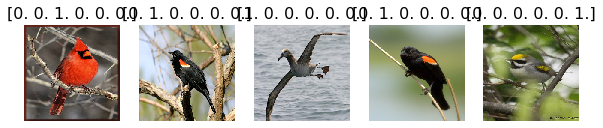

In [8]:
plots(imgs,titles=labels)

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())
model.add(Dense(64))



In [13]:
model.add(Dense(6))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history=model.fit(train1,validation_data=test1,steps_per_epoch=3,epochs=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
45/45 [==============================] - 9s 196ms/step - loss: 8.7818 - acc: 0.1448 - val_loss: 10.0232 - val_acc: 0.2389
Epoch 2/2
45/45 [==============================] - 9s 189ms/step - loss: 8.5779 - acc: 0.1493 - val_loss: 9.9362 - val_acc: 0.2389
